<a href="https://colab.research.google.com/github/nuzhatfaizah321/Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [65]:
# Load the CSV file

data = pd.read_csv('/content/Car_Price_Prediction.csv')

In [66]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [67]:
data.shape

(1000, 8)

In [68]:
# Check Null Values
data.isnull().values.any()

np.False_

In [69]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [70]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [71]:
len(data.columns)

8

In [72]:
data.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


# Exploratory Data Analysis (EDA) check for missing values, outliers, distributions, and correlations.

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['Year', 'Engine Size', 'Mileage', 'Price']

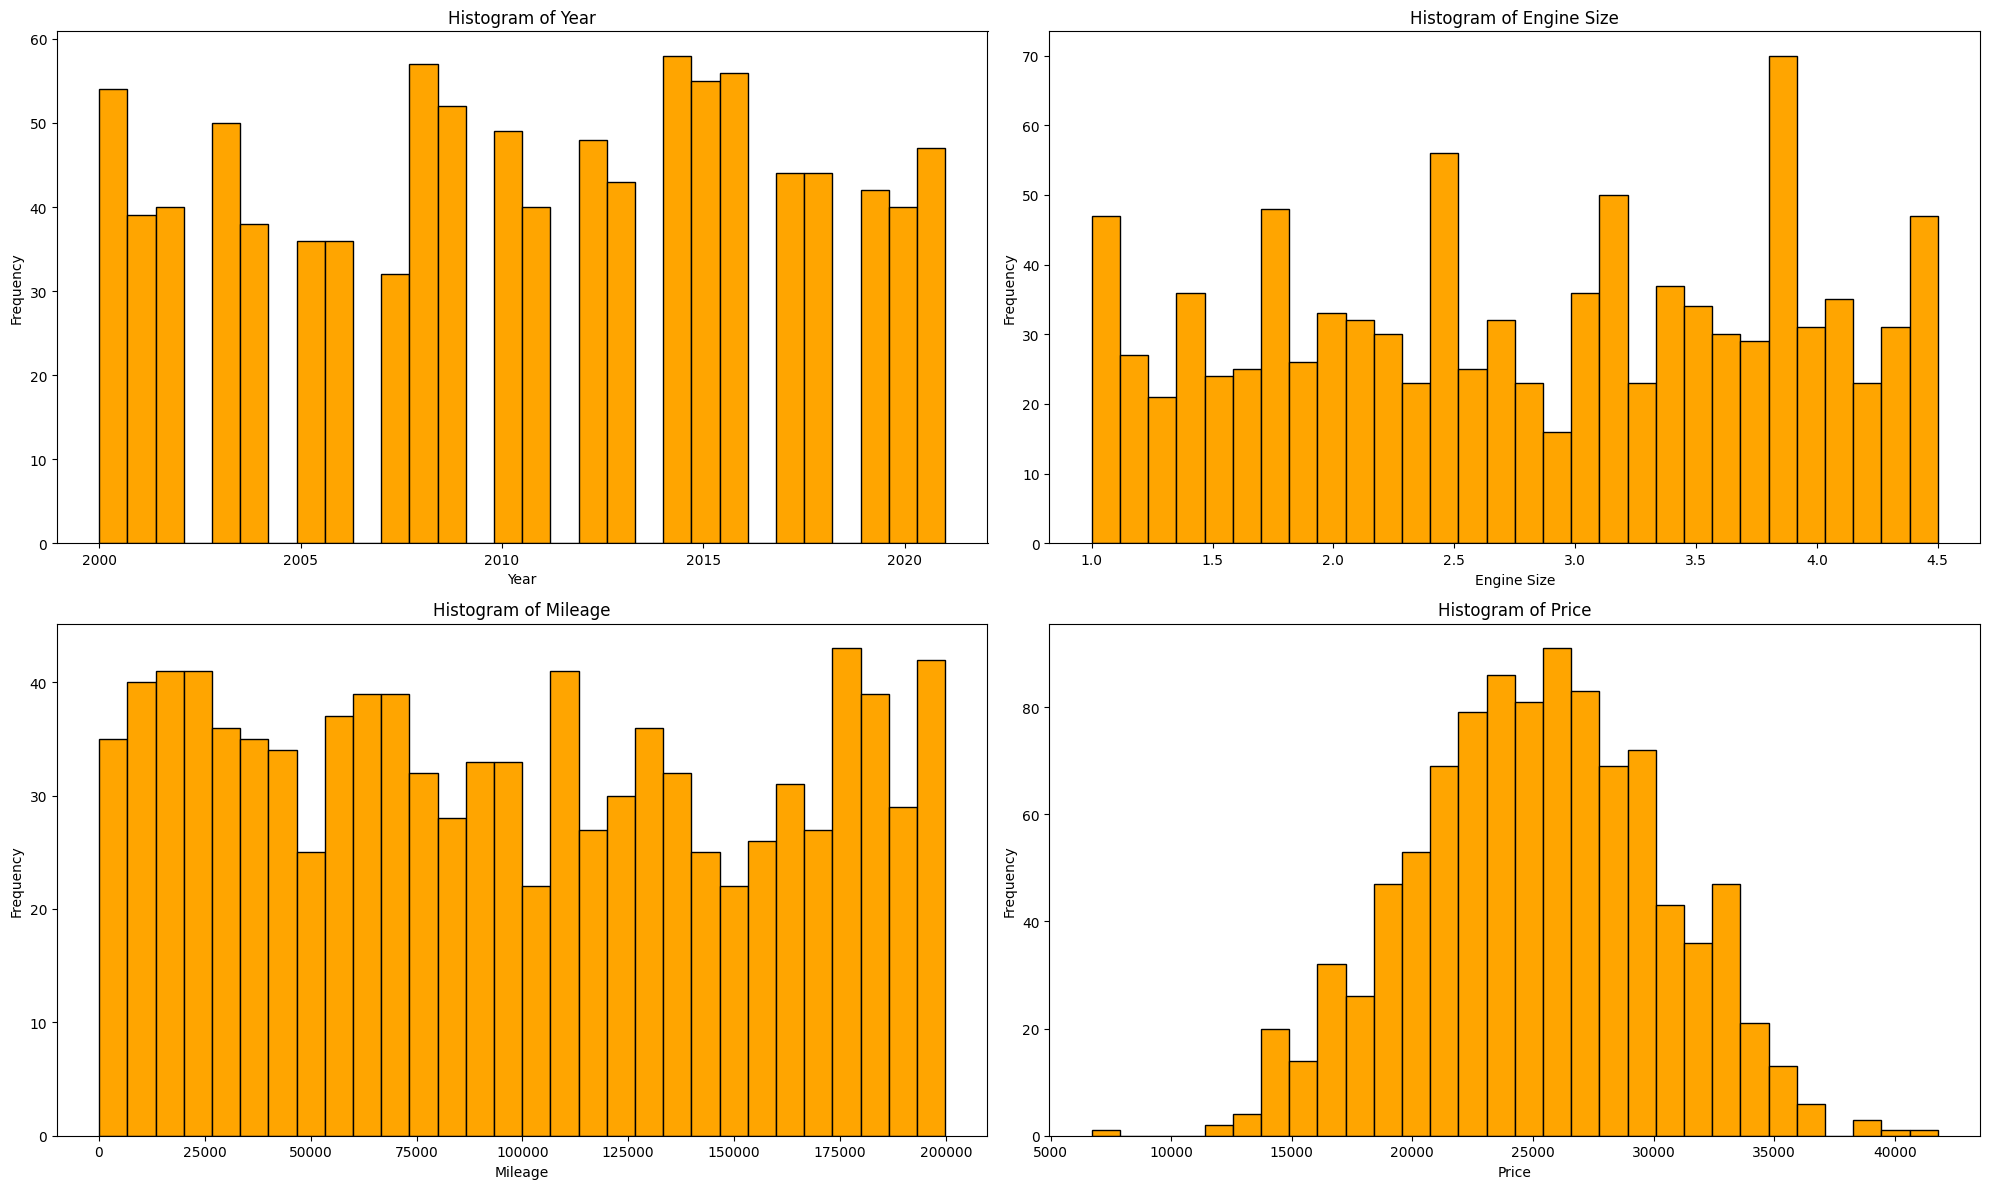

In [75]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/tmp/ipython-input-2325579735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Make', palette='Set2')


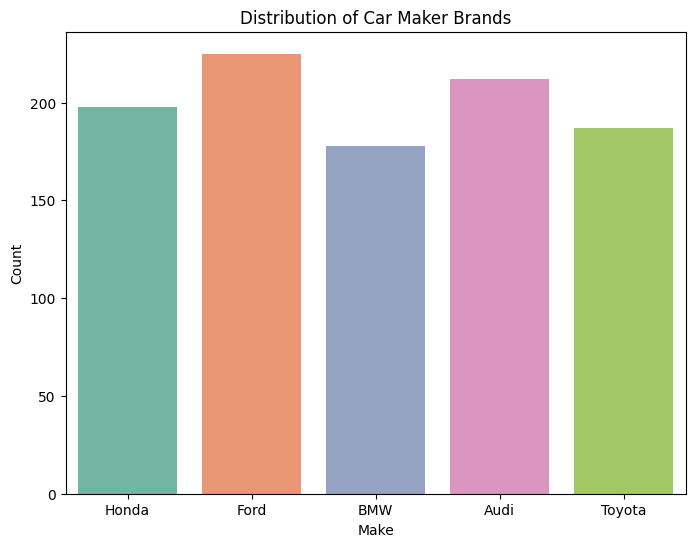

In [76]:
# Create a histogram for the 'Make' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Make', palette='Set2')
plt.title('Distribution of Car Maker Brands')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

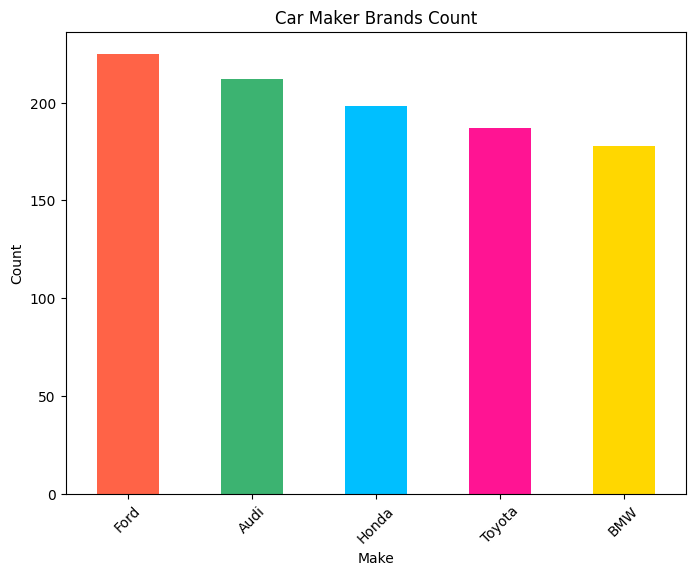

In [77]:
# Create a column chart for the 'ocean_proximity' variable
plt.figure(figsize=(8, 6))
ocean_proximity_counts = data['Make'].value_counts()
ocean_proximity_counts.plot(kind='bar', color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700'])
plt.title('Car Maker Brands Count')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

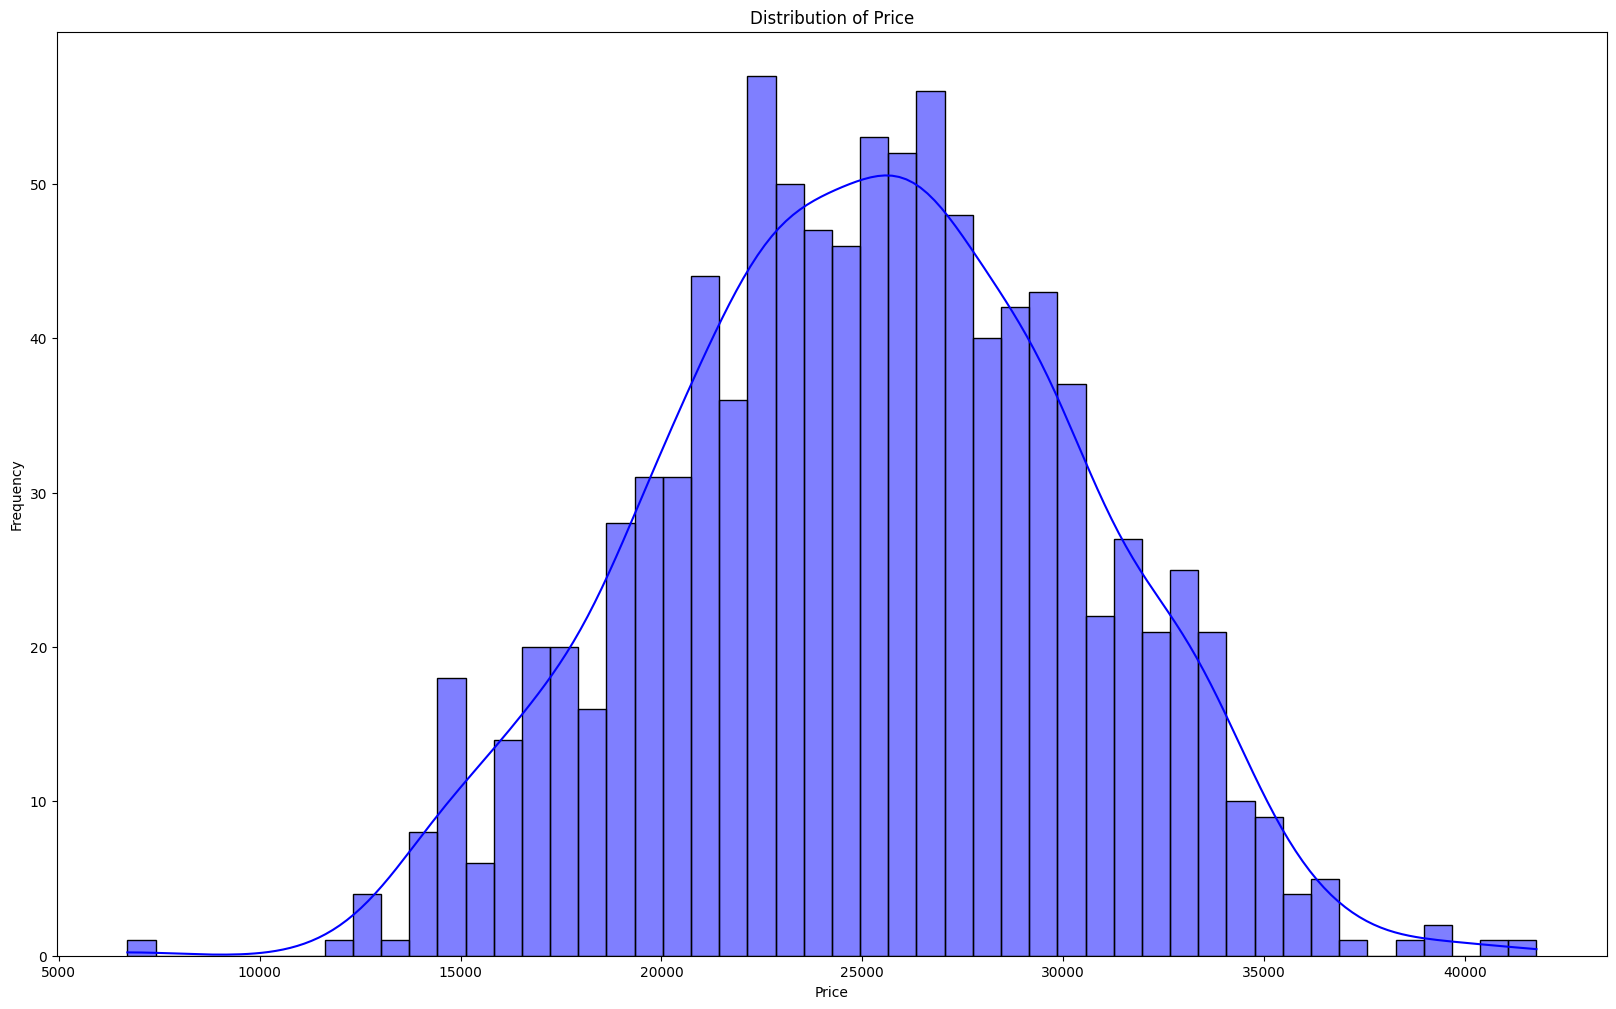

In [78]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Price'], kde=True, color='blue', bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [79]:
correlation_matrix = data.corr(numeric_only=True)

In [80]:
correlation_matrix

,Year,Engine Size,Mileage,Price
Year,1.000000,-0.012190,0.016376,0.609631
Engine Size,-0.012190,1.000000,-0.014815,0.383951
Mileage,0.016376,-0.014815,1.000000,-0.556560
Price,0.609631,0.383951,-0.556560,1.000000


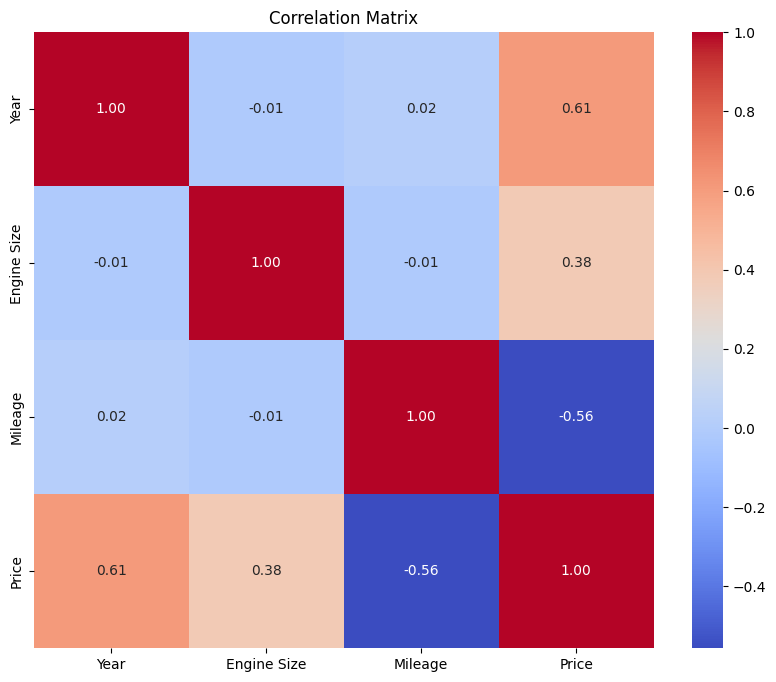

In [81]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [82]:
# Check for missing values
missing_values = data.isnull().sum()

In [83]:
missing_values

,0
Make,0
Model,0
Year,0
Engine Size,0
Mileage,0
Fuel Type,0
Transmission,0
Price,0


In [84]:
from sklearn.preprocessing import OneHotEncoder

# Use sparse_output=False (recommended for newer scikit-learn versions)
encoder = OneHotEncoder(sparse_output=False)
encoded_make = encoder.fit_transform(data[['Make']])

In [85]:
encoded_make

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [86]:
# If you want to include the encoded categorical column in correlations
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Make']])

# Create DataFrame from encoded data
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Make']))

# Combine with numeric data
numeric_data = data.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

# Now calculate correlations
correlation_matrix = all_data.corr()

In [87]:
# Check Null Values
all_data.isnull().values.any()

np.False_

In [88]:
# Check for missing values
missing_values = all_data.isnull().sum()

In [89]:
missing_values

,0
Year,0
Engine Size,0
Mileage,0
Price,0
Make_Audi,0
Make_BMW,0
Make_Ford,0
Make_Honda,0
Make_Toyota,0


In [90]:
all_data.shape

(1000, 9)

In [91]:
len(all_data.columns)

9

In [92]:
all_data.describe()

,Year,Engine Size,Mileage,Price,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530,0.212000,0.178000,0.225000,0.198000,0.187000
std,6.288577,1.024137,59447.31576,5181.401368,0.408929,0.382704,0.417791,0.398692,0.390107
min,2000.000000,1.000000,56.00000,6704.953524,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.900000,44768.75000,21587.878370,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,2.800000,94411.50000,25189.325247,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,3.700000,148977.75000,28806.368974,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,4.500000,199867.00000,41780.504635,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
correlation_matrix

,Year,Engine Size,Mileage,Price,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota
Year,1.000000,-0.012190,0.016376,0.609631,-0.045097,0.009789,-0.011354,0.090540,-0.042703
Engine Size,-0.012190,1.000000,-0.014815,0.383951,0.008510,-0.076357,0.031074,0.027792,0.004304
Mileage,0.016376,-0.014815,1.000000,-0.556560,0.031230,-0.009953,-0.016672,0.000593,-0.005723
Price,0.609631,0.383951,-0.556560,1.000000,-0.047353,-0.006690,0.020064,0.054260,-0.020740
Make_Audi,-0.045097,0.008510,0.031230,-0.047353,1.000000,-0.241368,-0.279476,-0.257721,-0.248760
Make_BMW,0.009789,-0.076357,-0.009953,-0.006690,-0.241368,1.000000,-0.250735,-0.231217,-0.223177
Make_Ford,-0.011354,0.031074,-0.016672,0.020064,-0.279476,-0.250735,1.000000,-0.267723,-0.258414
Make_Honda,0.090540,0.027792,0.000593,0.054260,-0.257721,-0.231217,-0.267723,1.000000,-0.238298
Make_Toyota,-0.042703,0.004304,-0.005723,-0.020740,-0.248760,-0.223177,-0.258414,-0.238298,1.000000


In [94]:
# Export DataFrame to CSV
all_data.to_csv('cdata.csv', index=False)  # index=False prevents pandas from writing row indices

In [95]:
# Step 3: Prepare the features (X) and target (y)
X = all_data.drop(columns=['Price'])
y = all_data['Price']

In [96]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_data)

In [97]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [98]:
# Step 6: Apply Random Forest Regressor for prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [100]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, mape, r2

(20.62697507551431,
 1121.3984955789479,
 np.float64(33.48728856714064),
 0.0008766684458200277,
 0.9999590232251366)